In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.model_selection import GridSearchCV
from scipy.stats import iqr
# from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("autos_mpg.csv", sep=",")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
#checking the shape of dataset
df.shape

(398, 9)

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# getting statistical information about data
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df['horsepower'] = df['horsepower'].replace('?', np.nan) #Replace '?' with NaN so the values will detect as null or missing value
df['horsepower'].isnull().sum()

6

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].dropna().astype(float).mean()).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
# df['car_name'] = LabelEncoder().fit_transform(df['car_name'])

In [ ]:
df = df.drop(columns = 'car_name')
df.head()
# We don't use car_name to predict MPG

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


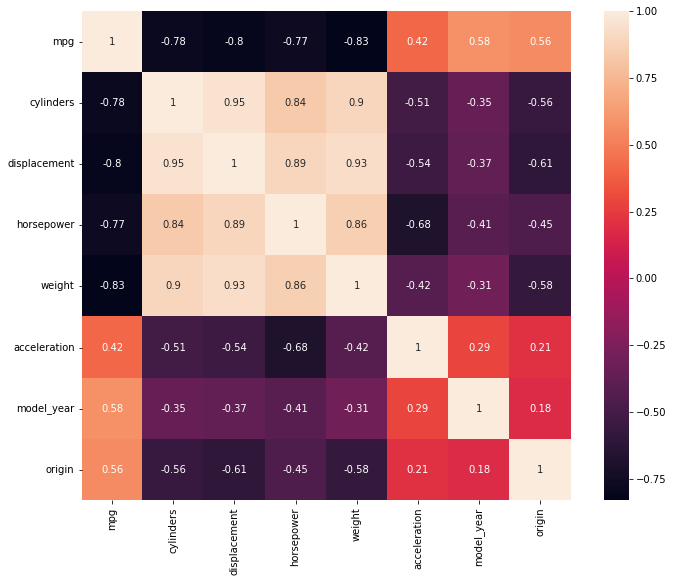

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);

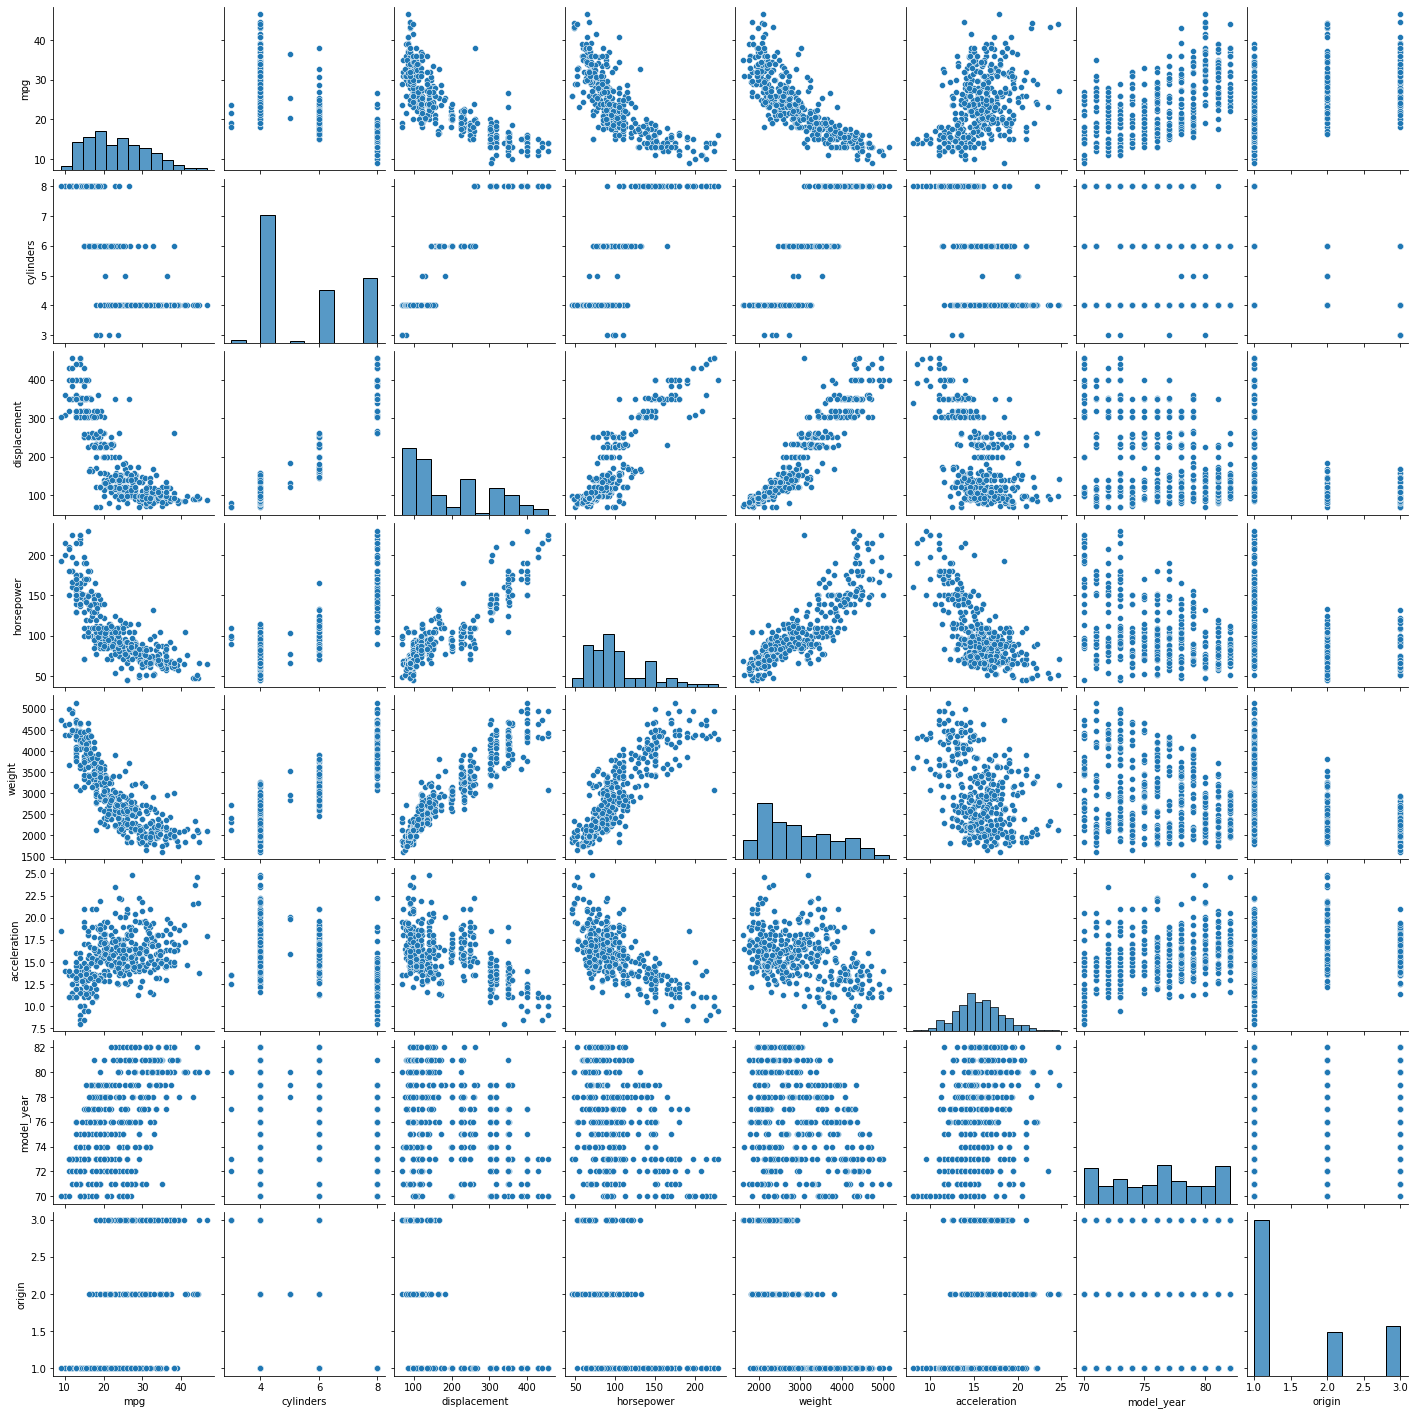

In [ ]:
sns.pairplot(df)
plt.show()

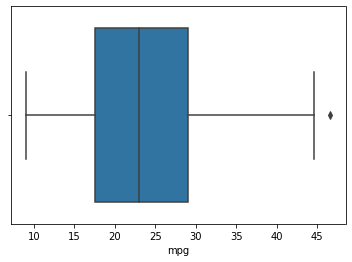

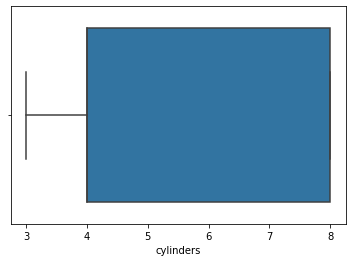

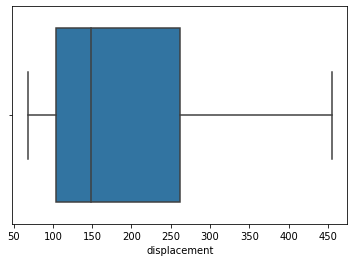

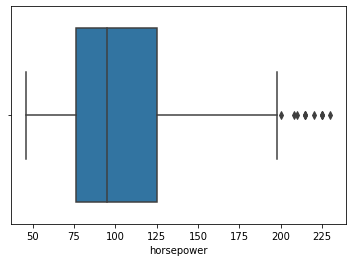

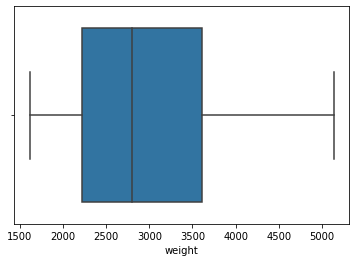

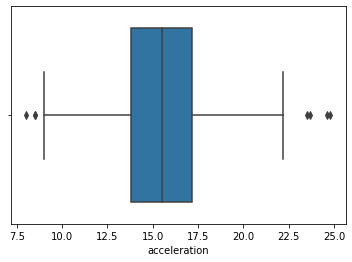

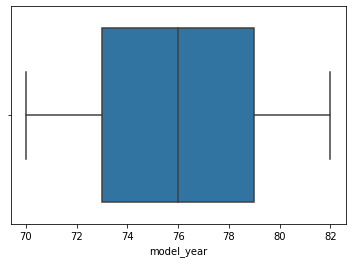

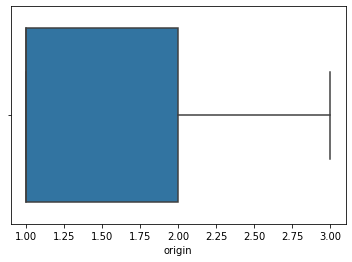

In [ ]:
for column in df:
    sns.boxplot(x=df[column])
    plt.show()

In [ ]:
for column in df:
    quartile_1, quartile_3 = np.percentile(df[column], [25, 75])
    iqr_value = iqr(df[column])
    lower_bound = quartile_1 - (iqr_value * 1.5)
    upper_bound = quartile_3 + (iqr_value * 1.5)
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

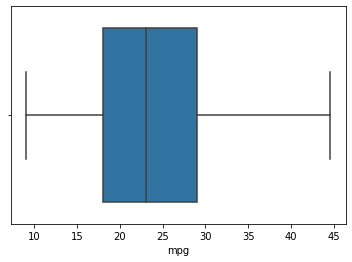

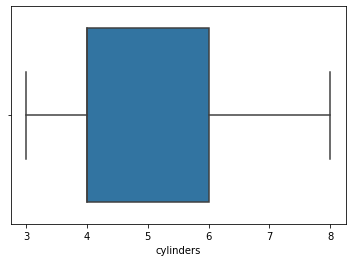

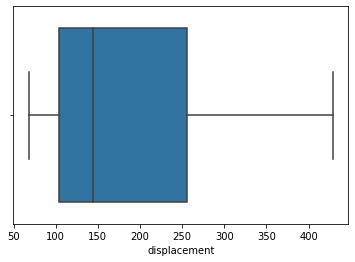

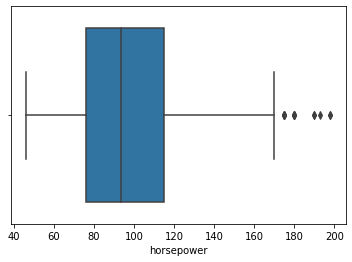

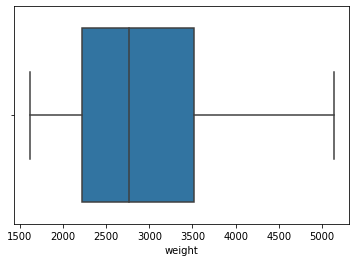

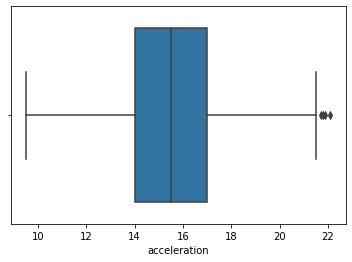

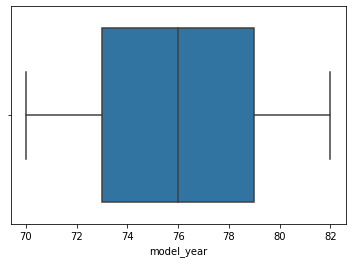

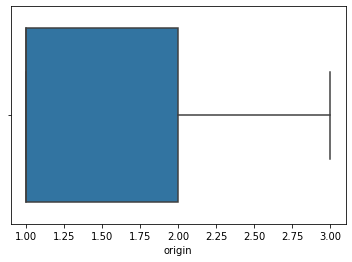

In [ ]:
for column in df:
    sns.boxplot(x=df[column])
    plt.show()

In [ ]:
def outlier_treatment(df):
    for column in df:
        df[column] = winsorize(df[column], limits=[0.05, 0.05])
    return df

df = outlier_treatment(df)

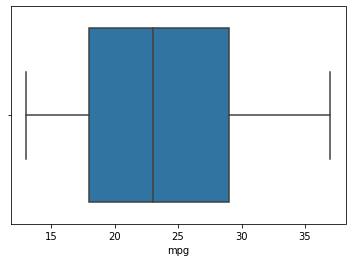

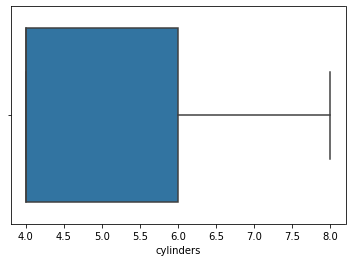

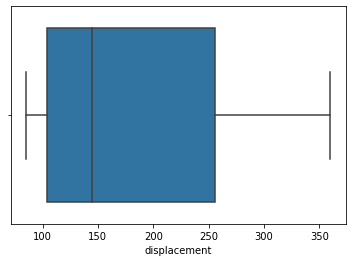

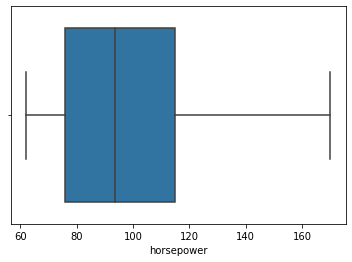

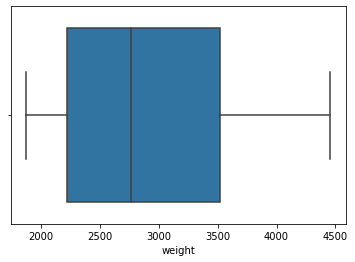

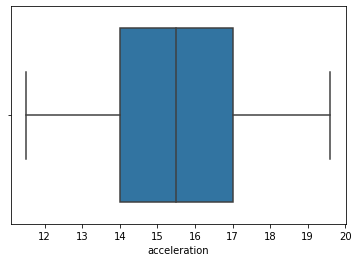

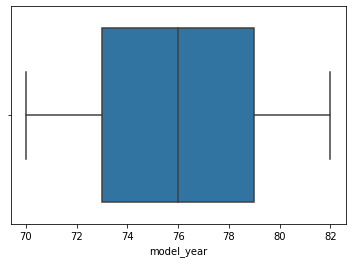

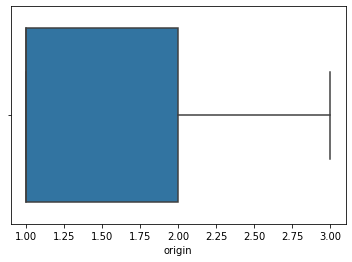

In [ ]:
for column in df:
    sns.boxplot(x=df[column])
    plt.show()

In [ ]:
Y = df.mpg
X = df.iloc[:,1:]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [ ]:
Y_train.shape


(321,)

In [ ]:
# Inisialisasi parameter model regresi boosting
parameters = {'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [50, 100, 150]}

# Inisialisasi model
model = GradientBoostingRegressor()

# Inisialisasi Grid Search dengan Cross Validation
grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = 5)

# Melakukan Grid Search dengan data training
grid_search.fit(X_train, Y_train)

# Menampilkan hasil terbaik dari Grid Search
print(grid_search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
# Latih model dengan data training
model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [ ]:
# Gunakan model untuk memprediksi nilai target pada data test
y_pred = model.predict(X_test)
print(y_pred)

[34.192786   20.93701273 24.74094113 19.50107524 29.05490714 34.18024376
 29.67889337 28.36612108 15.44149679 16.34117154 17.57691724 27.68889951
 24.29446447 30.8670594  18.83351502 16.08060126 20.04502463 21.20335402
 28.69545623 33.95525709 15.10858395 22.76049627 24.68659086 33.15304744
 34.21219724 28.55767199 27.34373097 15.77711956 19.74474466 22.66855307
 32.64095284 13.93003703 29.78266783 16.27772182 21.51270069 32.63392755
 17.83074797 30.51337407 31.35490734 20.36754758 22.30686497 31.32119614
 18.0048081  34.4865625  36.34192471 20.36327486 15.11007132 29.94489069
 22.38935135 18.26158342 26.86572406 13.63426378 23.52750517 34.08035333
 33.55135978 28.69980793 28.62697184]


###EVALUASI

In [ ]:
r2 = r2_score(Y_test, y_pred)
print(f" R2 Score: {r2*100:.2f}%")

 R2 Score: 87.32%
